<a href="https://colab.research.google.com/github/Strata-Tech/Twitter-Sentiment-Analysis/blob/main/twitter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tweepy
from tweepy import OAuthHandler
import textblob
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import pandas as pd



The score for positive tweets is 38.80597014925373%
The score for negative tweets is 7.462686567164178%


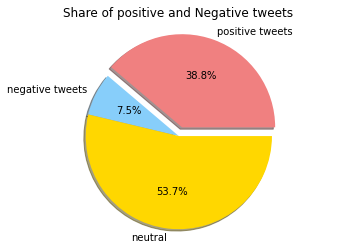

In [2]:
#creating generic Twitter class

class Twitterclient:
    def __init__(self):
        consumer_api_key = ''
        consumer_api_secret = ''
        access_token = ''
        access_token_secret = ''

        self.auth = OAuthHandler(consumer_api_key, consumer_api_secret)

        self.auth.set_access_token(access_token, access_token_secret)

        self.api = tweepy.API(self.auth)

    def clean_tweet(self,tweet):
        return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)',' ',tweet).split())

    def get_tweet_sentiment(self,tweet):
        analysis=TextBlob(self.clean_tweet(tweet))
        if analysis.sentiment.polarity>0:
            return 'Positive'

        elif analysis.sentiment.polarity<0:
            return 'Negative'

        else:
            return 'Neutral'

    def get_tweet(self,query,count):
        tweets=[]
        fetch_tweet=self.api.search(q=query,count=count)
        for tweet in fetch_tweet:
            parsed={}
            parsed['text']=tweet.text
            parsed['sentiment']=self.get_tweet_sentiment(tweet.text)
            if tweet.retweet_count>0:
                if parsed not in tweets:
                    tweets.append(parsed)

            else:
                tweets.append(parsed)
        return tweets

def main():
    api=Twitterclient()
    tweets=api.get_tweet(query='TSLA',count=200)
    ptweets=[tweet for tweet in tweets if tweet['sentiment']=='Positive']
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] =='Negative']
    print(f"The score for positive tweets is {(len(ptweets)/len(tweets))*100}%")
    print(f"The score for negative tweets is {(len(ntweets) / len(tweets)) * 100}%")

    positive=(len(ptweets) / len(tweets))
    negative = (len(ntweets) / len(tweets))
    neutral=1-(positive+negative)



    labels = 'positive tweets', 'negative tweets','neutral'
    sizes = [positive, negative,neutral]
    colors = ['lightcoral', 'lightskyblue','gold']
    explode = (0.1, 0,0)  # explode 1st slice


    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True)

    plt.axis('equal')
    plt.title(f"Share of positive and Negative tweets ")
    plt.show()

if __name__ == '__main__':
    main()


  

      